---
title: Michelson Interferometers
date: 2025-01-28
authors:
  - name: Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

A Michelson interferometer holds a special place in history.\
The its inventors, Michelson and Morley, used the interferometer to disprove the existance of a dispersive ether modulating light in our universe.\
Now, we use the Michelson interferometer as the fundamental building block of modern gravitational wave detectors.\
Today, we will overview the basics of the Michelson.

In [1]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        # "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# Michelson Topology

A Michelson interferometer is the second least-complicated non-trivial interferometer behind the Fabry-Perot.\
It does not have any recycling elements, i.e. no electric fields feed back to themselves, there are no loops in the graph.

A Michelson consists of a beamsplitter, typically 50:50, and two mirrors with reflectivity $r_x$ and $r_y$ which reflect the laser back to the beamsplitter.\
The space between mirror and beamsplitter are called *arms*.

The Michelson uses the *same* light source for both arms.\
This is crucial to ensuring the the light is coherent and split evenly in both arms of the interferometer.\
The Michelson also exhibits great *common mode rejection*: when the interferometer is held at it's *dark fringe*, where no light is transmitted, anything that happens to the source light will occur the same in both arms, and will tend to be reflected by the Michelson.\
We'll dive into these technical details below, but for now, we will assert the following:\
<span style="color:#ff9999">**the Michelson interferometer is an extremely good detector of *differential* motion: it can isolate differential signals, even in the presence of high common or source noise.**</span>

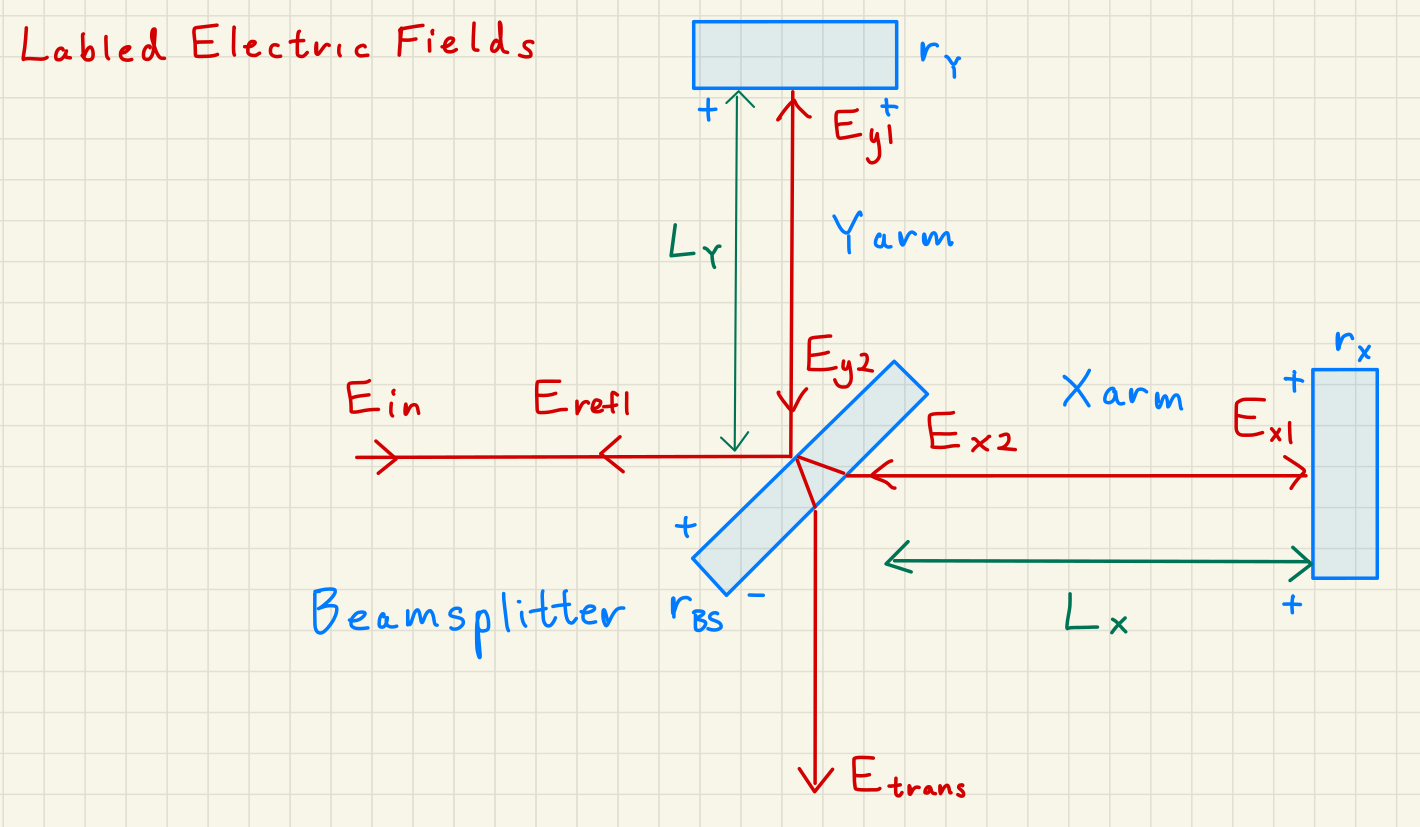

Michelson interferometer topology with electric fields labeled.

# Michelson Field Equations
If we assume plane-wave solutions to the Michelson $E_\mathrm{in} = E_0 e^{i \omega_0 t}$, 
and employ our propogating and mirror transition matrices,
we can write the following system of equations:
\begin{align}
\label{eq:michelson_system_of_equations}
E_\mathrm{x1} &= t_\mathrm{bs} e^{-i k L_x} E_\mathrm{in}\\
E_\mathrm{y1} &= -r_\mathrm{bs} e^{-i k L_y} E_\mathrm{in}\\
E_\mathrm{x2} &= -r_x e^{-i k L_x} E_\mathrm{x1}\\
E_\mathrm{y2} &= -r_y e^{-i k L_y} E_\mathrm{y1}\\
E_\mathrm{refl}  &= t_\mathrm{bs} E_\mathrm{x2} - r_\mathrm{bs} E_\mathrm{y2} \\
E_\mathrm{trans} &= r_\mathrm{bs} E_\mathrm{x2} + t_\mathrm{bs} E_\mathrm{y2} \\
\end{align}
where $E_\mathrm{refl}$ is the reflected, or *symmetric* port,\
and $E_\mathrm{trans}$ is the transmitted, or *antisymmetric* port.

I may switch haphazardly between $E_\mathrm{trans} = E_\mathrm{as}$.\
The term *antisymmetric* refers to how many reflections and transmissions the beam experiences.\
The antisymmetric port is also called the *dark port*, due to the fact the Michelson is often operated with no light at this port.  
The *symmetric* beam $E_\mathrm{refl}$ receives either two reflections or two transmissions, depending on which arm you focus on.\
The *antisymmetric* beam gets one reflection and transmission, no matter the arm you focus on.

We can use the optical diagram to draw a directed graph of the Michelson below.

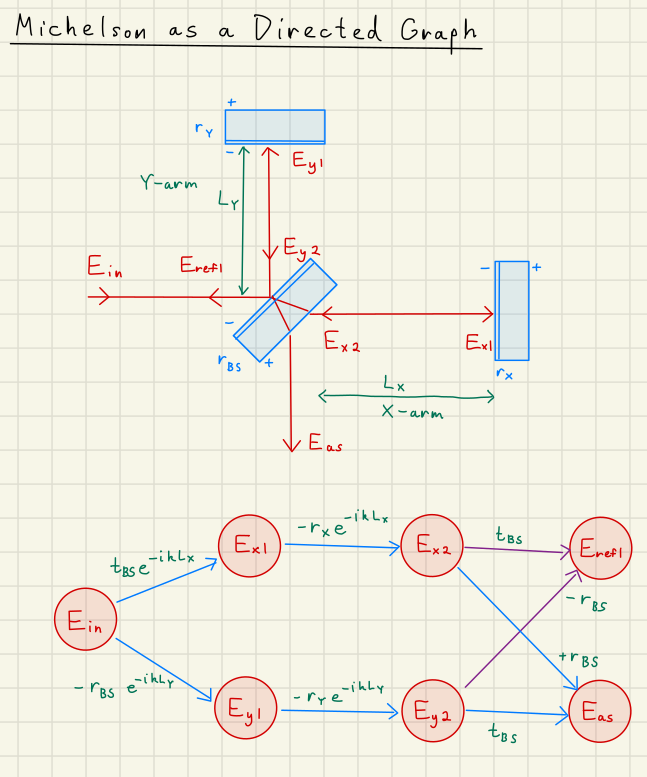

Michelson directed graphs

```{exercise}
:label: michelson-adjacency-matrix-exercise

Write out an adjacency matrix for the Michelson interferometer.

Find the transfer functions $\dfrac{E_\mathrm{refl}}{E_\mathrm{in}}$ and $\dfrac{E_\mathrm{trans}}{E_\mathrm{x1}}$.
```

```{solution} michelson-adjacency-matrix-exercise
:label: michelson-adjacency-matrix-exercise-solution
:class: dropdown

First, the electric field state vector is 
\begin{align}
\boldsymbol{E} = \begin{bmatrix}
E_\mathrm{in} &
E_\mathrm{x1} &
E_\mathrm{y1} &
E_\mathrm{x2} &
E_\mathrm{y2} &
E_\mathrm{refl} &
E_\mathrm{trans}
\end{bmatrix}^T
\end{align}

Then the adjacency matrix $\boldsymbol{M}$ becomes:
\begin{align}
\begin{array}{cccc}
\boldsymbol{E}_{n+1} & = & \boldsymbol{M} &\boldsymbol{E}_{n} \\~\\
\begin{bmatrix}
E_\mathrm{in} \\
E_\mathrm{x1} \\
E_\mathrm{y1} \\
E_\mathrm{x2} \\
E_\mathrm{y2} \\
E_\mathrm{refl} \\
E_\mathrm{trans}
\end{bmatrix}_{n+1}
&=&
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 t_\mathrm{bs} e^{-i k L_x} & 0 & 0 & 0 & 0 & 0 & 0 \\
-r_\mathrm{bs} e^{-i k L_y} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & r_x e^{-i k L_x} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & r_y e^{-i k L_y} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & t_\mathrm{bs} & -r_\mathrm{bs} & 0 & 0 \\
0 & 0 & 0 & r_\mathrm{bs} & t_\mathrm{bs} & 0 & 0 \\
\end{bmatrix} 
&\begin{bmatrix}
E_\mathrm{in} \\
E_\mathrm{x1} \\
E_\mathrm{y1} \\
E_\mathrm{x2} \\
E_\mathrm{y2} \\
E_\mathrm{refl} \\
E_\mathrm{trans}
\end{bmatrix}_{n}
\end{array}
\end{align}

Inverting the identity matrix minus the adjacency matrix gives us the steady state transfer functions for each of the electric fields:
\begin{align}
\label{eq:michelson_tf_matrix}
\boldsymbol{(I - M)}^{-1} = 
\begin{bmatrix}
 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 t_\mathrm{bs} e^{-i k L_x} & 1 & 0 & 0 & 0 & 0 & 0 \\
 -r_\mathrm{bs} e^{-i k L_y} & 0 & 1 & 0 & 0 & 0 & 0 \\
 -r_x t_\mathrm{bs} e^{-i 2 k L_x} & -r_x e^{-i k L_x} & 0 & 1 & 0 & 0 & 0 \\
 r_\mathrm{bs} r_y e^{-i 2 k L_y} & 0 & -r_y e^{-i k L_y} & 0 & 1 & 0 & 0 \\
 -r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - r_x t_\mathrm{bs}^2 e^{-i 2 k L_x} & -r_x t_\mathrm{bs} e^{-i k L_x} & r_\mathrm{bs} r_y e^{-i k L_y} & t_\mathrm{bs} & -r_\mathrm{bs} & 1 & 0 \\
 r_\mathrm{bs} r_y t_\mathrm{bs} e^{-i 2 k L_y} - r_\mathrm{bs} r_x t_\mathrm{bs} e^{-i 2 k L_x} & -r_\mathrm{bs} r_x e^{-i k L_x} & -r_y t_\mathrm{bs} e^{-i k L_y} & r_\mathrm{bs} & t_\mathrm{bs} & 0 & 1 \\
\end{bmatrix} 
\end{align}
This matrix contains all the transfer functions from one field to another.\
For instance, the transfer function from $E_\mathrm{in}$ to $E_\mathrm{refl}$ will simply be the matrix element in the first column (cooresponding to $E_\mathrm{in}$)\
and the sixth row (cooresponding to $E_\mathrm{refl}$), or matrix element $[[6,1]]$:
\begin{align}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= \boldsymbol{(I - M)}^{-1}[[6,1]] \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - t_\mathrm{bs}^2 r_x e^{-i 2 k L_x}
\end{align}
Similarly:
\begin{align}
\dfrac{E_\mathrm{trans}}{E_\mathrm{x1}} &= \boldsymbol{(I - M)}^{-1}[[7,2]] \\
\dfrac{E_\mathrm{trans}}{E_\mathrm{x1}} &= -r_\mathrm{bs} r_x e^{-i k L_x}
\end{align}

```

## Solutions to the Michelson Output Fields

From our solutions to either Eq. [](#eq:michelson_system_of_equations), or from [](#michelson-adjacency-matrix-exercise-solution),\
we can solve for the symmetric and antisymmetric output fields $E_\mathrm{refl}$ and $E_\mathrm{trans}$ from the only source field $E_\mathrm{in}$: 

\begin{align}
\label{eq:output_fields}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - t_\mathrm{bs}^2 r_x e^{-i 2 k L_x}\\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} &= r_\mathrm{bs} t_\mathrm{bs} r_y e^{-i 2 k L_y} - r_\mathrm{bs} t_\mathrm{bs} r_x e^{-i 2 k L_x}\\
\end{align}

Let's stop here to analyze these Equations [](#eq:output_fields) briefly.


## Analysis
There are a couple of key observations we can make about the Michelson output fields.

1. **The main interference in both output fields comes from the difference in the arm lengths $L_x$ and $L_y$.**\
This represents a degree of freedom of our optical system, called the *differential arm length*, or DARM.
2. **Sign difference in the interference**\
If $L_x = L_y$, we get destructive interference at $E_\mathrm{trans}$ and constructive interference at $E_\mathrm{refl}$.\
This allows us to conserve power output from the interferometer.
4. **Perfect interference relies on matching the reflectivity of the end mirrors $r_x = r_y$, as well as having a ideal beamsplitter $r_\mathrm{bs} = t_\mathrm{bs}$.**\
Imperfect interference will lead to *contrast defect*, a crucial parameter for interferometers.
5. **No matter the field or frequency of the input field, the output fields will be an attenuated copy of the input field.**\
For a perfect Michelson, *common mode rejection* tends to *reflect* any changes in $E_\mathrm{in}$ back toward the input port $E_\mathrm{refl}$.\
This is ideal if we care only about motion of the mirrors from the differential degree of freedom DARM.

## Simplifications 
For a first analysis, it's common to assume some basic parameters and make some simplications of the transfer functions in Eq. [](#eq:output_fields).
\begin{align}
\label{eq:phase_xy}
\phi_x &= k L_x \\
\phi_y &= k L_y
\end{align}
represents our single-pass phase of each arm,
\begin{align}
\label{eq:bs_lossless}
r_\mathrm{bs} &= t_\mathrm{bs} = \dfrac{1}{\sqrt{2}}
\end{align}
represents the lossless, perfect 50:50 beamsplitter, and
\begin{align}
r_x = r_y \approx 1
\end{align}
represents the matched, perfectly reflecting end mirrors
\begin{align}
\label{eq:darm_common_phases}
\phi_d &= \phi_x - \phi_y\\
\phi_c &= \phi_x + \phi_y
\end{align}
are the differential phase $\phi_d$ and common phase $\phi_c$.\
Note that the differential arm *length* and phase are related like $\phi_d = k (L_x - L_y)$,
and inverting the solutions in Eq. [](#eq:darm_common_phases) yields
\begin{align}
\label{eq:arm_common_phases}
\phi_x &= \dfrac{\phi_c + \phi_d}{2}\\
\phi_y &= \dfrac{\phi_c - \phi_d}{2}
\end{align}


Applying the above simplifications to our output transfer function $E_\mathrm{in}$ to $E_\mathrm{refl}$ yields
\begin{align}
\label{eq:refl_simple_field}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 k L_y} - t_\mathrm{bs}^2 r_x e^{-i 2 k L_x}\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 \phi_y} - t_\mathrm{bs}^2 r_x e^{-i 2 \phi_x}\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} ( e^{-i 2 \phi_y} + e^{-i 2 \phi_x} )\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} ( e^{-i (\phi_c - \phi_d)} + e^{-i (\phi_c + \phi_d) )} \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} e^{-i \phi_c} ( e^{i \phi_d} + e^{-i \phi_d} )\\
\end{align}
yields a crucial result
\begin{align}
\label{eq:simple_mich_reflection}
\boxed{ \dfrac{E_\mathrm{refl}}{E_\mathrm{in}} = - e^{-i \phi_c} \cos(\phi_d) }
\end{align}

Going through a similar derivation gives $E_\mathrm{trans}$
\begin{align}
\label{eq:simple_mich_transmission}
\boxed{ \dfrac{E_\mathrm{trans}}{E_\mathrm{in}} = - i e^{-i \phi_c} \sin(\phi_d) }
\end{align}

Equations [](#eq:simple_mich_reflection) and [](#eq:simple_mich_transmission) represent the fields at the outputs of the Michelson.\
Both fields are rotated by an arbitrary phasor $e^{-i \phi_c}$, which corresponds to the common mode length of the Michelson arms.\
Both fields amplitudes are modulated by the differential arm length $\phi_d$, 90 degrees out-of-phase with one another.\
Finally, both are rotated relative to each other by a factor of $i$, putting them in strictly different quadratures of light.

## Quadrature Picture
Writing Eqs. [](#eq:simple_mich_reflection) and [](#eq:simple_mich_transmission) in the quadrature picture yields
\begin{align}
\label{eq:quadrature_rep_simple_mich}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} = - \begin{bmatrix} 
\cos{\phi_c} \\ 
\sin{\phi_c} 
\end{bmatrix}
\cos(\phi_d) \\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} = \begin{bmatrix} 
-\sin{\phi_c} \\ 
\cos{\phi_c} 
\end{bmatrix}
\sin(\phi_d)
\end{align}
which emphasizes how the common phase $\phi_c$ rotates which quadrature the light is in,\
but has no effect on the amplitude of the light.\
The differential phase $\phi_d$ is the most crucial for determining whether the field is transmitted or not.
The quadrature picture is illustrated in the interactive phasor plot below.



## Operating Points
### Dark Fringe $\phi_d = 0$
**Typically, the differential phase $\phi_d = 0$ will be the desired operating point.**\
This represents the *dark fringe*, the operating point at which the arms are balanced at the microscopic level, i.e. their lengths are precisely the same.\
The transmitted field $E_\mathrm{trans}$ will be zero in this instance, and the entire beam in the interferometer will be reflected at $E_\mathrm{refl}$.

### Bright Fringe $\phi_d = \dfrac{\pi}{2}$
On the other hand, it's also possible to send all of the light to the transmitted field $E_\mathrm{trans}$,
by setting $\phi_d = \dfrac{\pi}{2}$. 
This is called the *bright fringe*, and is useful for maximizing power through the Michelson,\
aligning the Michelson mirrors using the fringes, establishing optical output paths, and estimating output losses.

### Dark Offset $\phi_d = \epsilon$
Finally, a *dark offset* is when the Michelson is operated *near* to a perfect dark fringe, but not directly there: $\phi_d = \epsilon \ll 1$.\
This is often done to allow a small amount of electric field to "leak out" of the Michelson transmission, 
to allow a strong local oscillator to beat with a weak signal of interest.\
This is currently how Advanced LIGO's DARM degree of freedom is detected, via the *DARM offset* detection technique,
which allows for exquisite sensitivity to our weak signal of gravitational waves.

## Fringe Width 
In a real "balanced" Michelson interferometer, the lengths are not exactly the same, so we write
\begin{align}
\label{eq:fringe_width}
\phi_d = 2 k (L_x - L_y) = \dfrac{4 \pi (L_x - L_y)}{ \lambda } &= 2 \pi m \qquad \forall \,m \,\in \mathbb{Z}\\
\rightarrow L_x - L_y = \dfrac{ \lambda }{ 2 } m
\end{align}
The above relationship defines the *fringe width* of the Michelson, 
i.e. the length the mirrors must be moved to cycle from one dark resonance to another.

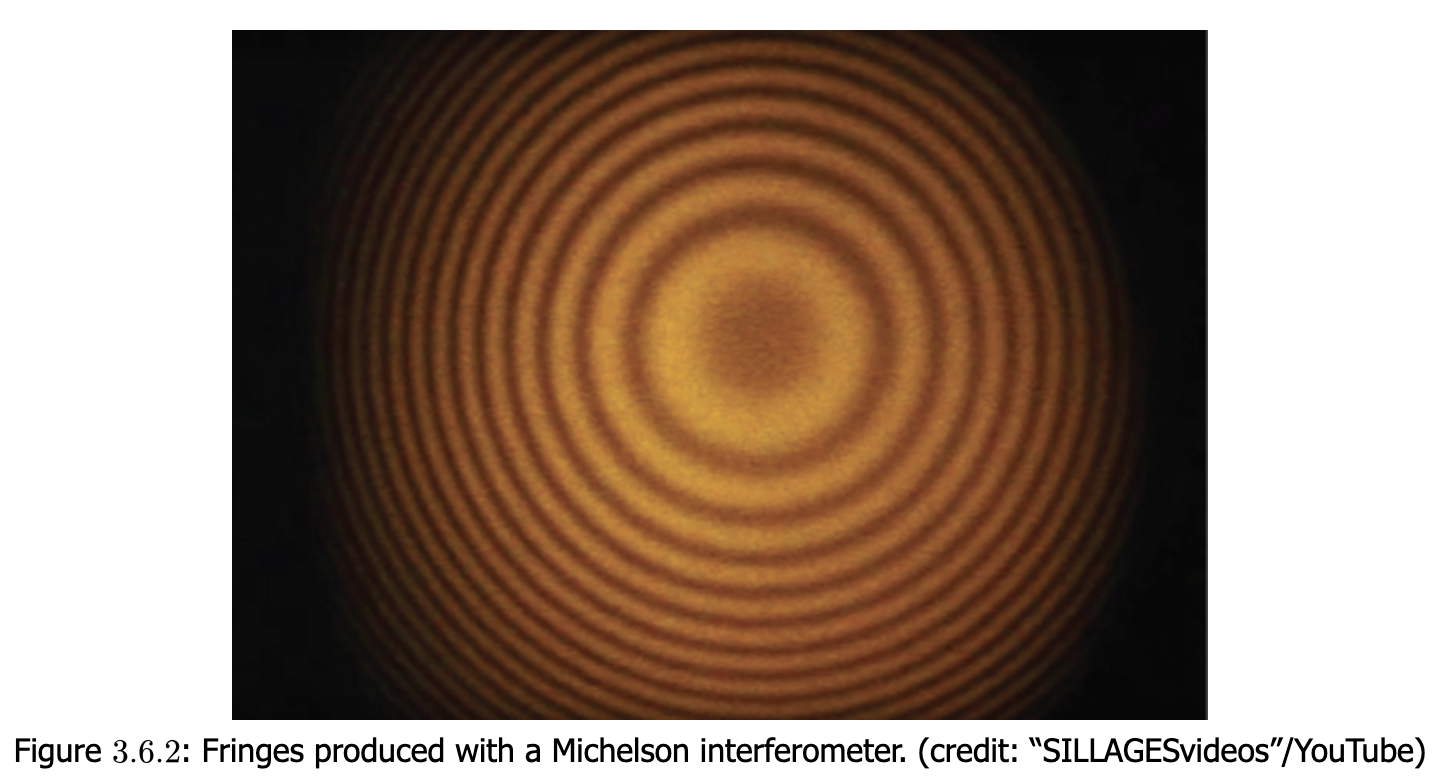

Common Michelson Fringe Pattern


## Free Spectral Range
Via similar logic to the fringe width, the Michelson *free spectral range*, or the frequency spacing between fringes, 
can be found to be the same as for the Fabry-Perot:
\begin{align}
\label{eq:mich_fsr}
\mathrm{FSR} = \dfrac{c}{2 L}
\end{align} 

## Contrast Defect
*Contrast defect* defines the light power that transmits through the Michelson even when held on perfect resonance.\
This is due to imperfections in the Michelson interference achieved at the antisymmetric port.\
Below we examine one such imbalance where the arm reflectivites are different.

```{exercise}
:label: michelson-simple-trans-exercise
~\
Go through the derivation for the simplified responses $\dfrac{E_\mathrm{refl}}{E_\mathrm{in}}$ and $\dfrac{E_\mathrm{trans}}{E_\mathrm{in}}$,\
but this time do not assume $r_x = r_y \approx 1$, and let $r_x$ and $r_y$ be different.
You may still assume the beamsplitter is ideal (Eq [](#eq:bs_lossless)).

*Hint:* Choose a common and differential basis for the reflectivities of $r_x$ and $r_y$.
```

```{solution} michelson-simple-trans-exercise
:label: michelson-simple-trans-exercise-solution
:class: dropdown

Start with Eq. [](#eq:output_fields), but set 
\begin{align}
r_x = r_c + r_d\\
r_y = r_c - r_d
\end{align}

This will give us, for $\dfrac{E_\mathrm{refl}}{E_\mathrm{in}}$:
\begin{align}
\label{eq:refl_with_diff_refl}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -r_\mathrm{bs}^2 r_y e^{-i 2 \phi_y} - t_\mathrm{bs}^2 r_x e^{-i 2 \phi_x}\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} (r_c - r_d) e^{-i (\phi_c - \phi_d)} -\dfrac{1}{2} (r_c + r_d) e^{-i (\phi_c + \phi_d) } \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= -\dfrac{1}{2} r_c (e^{-i (\phi_c - \phi_d)} + e^{-i (\phi_c + \phi_d) }) + \dfrac{1}{2} r_d (e^{-i (\phi_c - \phi_d)} - e^{-i (\phi_c + \phi_d) }) \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - r_c e^{-i \phi_c} \cos{\phi_d} - i r_d e^{-i \phi_c} \sin{\phi_d} \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - e^{-i \phi_c} \left( r_c \cos{\phi_d} - i r_d  \sin{\phi_d} \right) \\
\end{align}

For the last solution of [](#eq:refl_with_diff_refl), the right-hand-side's left term is the same as Eq. [](#eq:simple_mich_reflection) above.\
But the right term depends on the differential reflectivity $r_d$ which is in a different quadrature (rotated by $i$).  

A similar derivation will give $\dfrac{E_\mathrm{trans}}{E_\mathrm{in}}$:
\begin{align}
\label{eq:trans_with_diff_refl}
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} &= - e^{-i \phi_c} \left(r_d \cos{\phi_d} - i r_c  \sin{\phi_d} \right) \\
\end{align}
which also experiences an alteration of the quadrature of light due to differential reflectivity $r_d$.

This light in the wrong quadrature due to $r_d$ is called *contrast defect*.\
Contrast defect light shows up at the antisymmetric port even when the interferometer is held perfectly on resonance, i.e. $\phi_d = 0$.\
This limits the achievable level of *common-mode rejection* in the interferometer.\
It also is a cause of noise inside the interferometer, as it tends to mix with weak electric field modulation.\
So the contrast defect field carries no useful signal about DARM, but contributes noise to the interferometer.\
We work hard to ensure our interferometer arms are well-matched in reflectivity, as well as all aspects, to limit the level of contrast defect.
```

## Michelson Phasors

In [2]:
# Michelson reflection, including contrast defect r_d
def mich_refl(phi_d, phi_c, r_d, r_c):
    deg = np.pi/180
    return -np.exp(1j * deg * phi_c) * (r_c * np.cos(deg * phi_d) - 1j * r_d * np.sin(deg * phi_d))

# Michelson transmission, including contrast defect r_d
def mich_trans(phi_d, phi_c, r_d, r_c):
    deg = np.pi/180
    return -np.exp(1j * deg * phi_c) * (-1j * r_c * np.sin(deg * phi_d) + r_d * np.cos(deg * phi_d))

In [3]:
phi_d = 0
phi_c = 0
r_d = -0.05
r_c = 0.9

interactive(children=(FloatSlider(value=0.0, description='$\\phi_d$ [deg]:', max=180.0, min=-180.0, readout_fo…

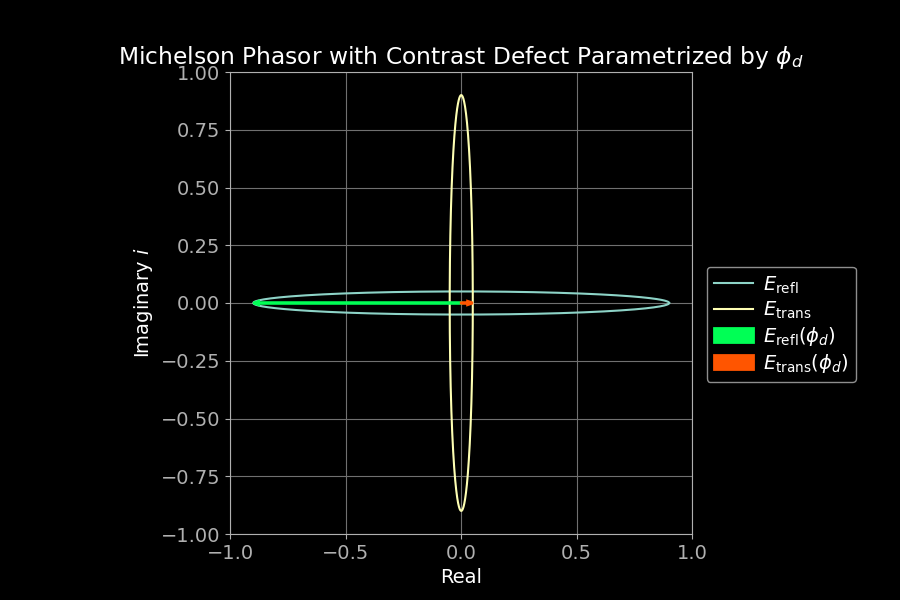

In [4]:
#| label: fig:interactive_mich_phasors
#| "tags": [ "hide-input",]
fig, ax1 = plt.subplots(1)

phi_ds = np.linspace(-180, 180, 10000)

plot_mich_refl = mich_refl(phi_ds, phi_c, r_d, r_c)
plot_mich_trans = mich_trans(phi_ds, phi_c, r_d, r_c)

plot_mich_refl0 = mich_refl(phi_d, phi_c, r_d, r_c)
plot_mich_trans0 = mich_trans(phi_d, phi_c, r_d, r_c)

plot_real_mich_refl0 = np.real(plot_mich_refl0)
plot_imag_mich_refl0 = np.imag(plot_mich_refl0)
plot_real_mich_trans0 = np.real(plot_mich_trans0)
plot_imag_mich_trans0 = np.imag(plot_mich_trans0)

plot_real_mich_refl = np.real(plot_mich_refl)
plot_imag_mich_refl = np.imag(plot_mich_refl)
plot_real_mich_trans = np.real(plot_mich_trans)
plot_imag_mich_trans = np.imag(plot_mich_trans)

# line1, = ax1.plot([0, plot_real_ecav0], [0, plot_imag_ecav0], 'o-', label=r"$E_mathrm{cav}(\phi_0)$")
arc1, = ax1.plot(plot_real_mich_refl, plot_imag_mich_refl, label=r"$E_\mathrm{refl}$")
arc2, = ax1.plot(plot_real_mich_trans, plot_imag_mich_trans, label=r"$E_\mathrm{trans}$")

arrow1 = ax1.arrow(0, 0, plot_real_mich_refl0, plot_imag_mich_refl0, shape='full', color="#00ff55", lw=2, 
                  length_includes_head=True, head_width=.015, zorder=2, label=r"$E_\mathrm{refl}(\phi_d)$")
arrow2 = ax1.arrow(0, 0, plot_real_mich_trans0, plot_imag_mich_trans0, shape='full', color="#ff5500", lw=2, 
                  length_includes_head=True, head_width=.015, zorder=2, label=r"$E_\mathrm{trans}(\phi_d)$")

ax1.set_xlabel("Real")
ax1.set_ylabel("Imaginary $i$")
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.grid()

ax1.set_title(r"Michelson Phasor with Contrast Defect Parametrized by $\phi_d$")

ax1.legend(bbox_to_anchor=(1.01, 0.6))
ax1.set_aspect('equal')
# plt.tight_layout()

def update_mich(
    phi_d_slider_value=phi_d,
    phi_c_slider_value=phi_c,
    r_d_slider_value=r_d,
    r_c_slider_value=r_c
):
    """
    Create an interactive intracavity field phasor plot
    """
    new_phi_d = phi_d_slider_value
    new_phi_c = phi_c_slider_value
    new_r_d = r_d_slider_value
    new_r_c = r_c_slider_value
    
    new_plot_mich_refl = mich_refl(phi_ds, new_phi_c, new_r_d, new_r_c)
    new_plot_mich_trans = mich_trans(phi_ds, new_phi_c, new_r_d, new_r_c)
    
    new_plot_mich_refl0 = mich_refl(new_phi_d, new_phi_c, new_r_d, new_r_c)
    new_plot_mich_trans0 = mich_trans(new_phi_d, new_phi_c, new_r_d, new_r_c)
    
    new_plot_real_mich_refl0 = np.real(new_plot_mich_refl0)
    new_plot_imag_mich_refl0 = np.imag(new_plot_mich_refl0)
    new_plot_real_mich_trans0 = np.real(new_plot_mich_trans0)
    new_plot_imag_mich_trans0 = np.imag(new_plot_mich_trans0)
    
    new_plot_real_mich_refl = np.real(new_plot_mich_refl)
    new_plot_imag_mich_refl = np.imag(new_plot_mich_refl)
    new_plot_real_mich_trans = np.real(new_plot_mich_trans)
    new_plot_imag_mich_trans = np.imag(new_plot_mich_trans)

    arc1.set_xdata(new_plot_real_mich_refl)
    arc1.set_ydata(new_plot_imag_mich_refl)
    arc2.set_xdata(new_plot_real_mich_trans)
    arc2.set_ydata(new_plot_imag_mich_trans)
    arrow1.set_data(x=0, y=0, dx=new_plot_real_mich_refl0,  dy=new_plot_imag_mich_refl0)
    arrow2.set_data(x=0, y=0, dx=new_plot_real_mich_trans0, dy=new_plot_imag_mich_trans0)
    
    fig.canvas.draw_idle()
    return

# Create interactive widget
phi_d_slider = FloatSlider(
    value=phi_d,
    min=-180,
    max=180,
    step=0.1,
    description=r"$\phi_d$ [deg]:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
phi_c_slider = FloatSlider(
    value=phi_c,
    min=-180,
    max=180,
    step=0.1,
    description=r"$\phi_c$ [deg]:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
r_d_slider = FloatSlider(
    value=r_d,
    min=-1,
    max=1,
    step=0.01,
    description=r"$r_d$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
r_c_slider = FloatSlider(
    value=r_c,
    min=0,
    max=1,
    step=0.01,
    description=r"$r_c$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(
    update_mich, 
    phi_d_slider_value=phi_d_slider,
    phi_c_slider_value=phi_c_slider,
    r_d_slider_value=r_d_slider,
    r_c_slider_value=r_c_slider,
)
plt.show()

# Michelson Power

In gravitational wave detectors, $E_\mathrm{trans}$ carries the gravitational wave signal.\
The power at the antisymmetric port of the interferometer $P_\mathrm{trans}$ are what are actually measurable.

It is simple to calculate the power $P = |E|^2$, again assuming perfect arm reflectivity $r_x = r_y = 1$:
\begin{align}
\label{eq:output_powers}
\dfrac{P_\mathrm{refl}}{P_\mathrm{in}} = \cos^2(\phi_d)\\
\dfrac{P_\mathrm{trans}}{P_\mathrm{in}} = \sin^2(\phi_d)
\end{align}

From Eq. [](#eq:output_powers), we see that if we have a small differential signal $\phi_d = \phi_\mathrm{sig} \ll 1$ applied to the interferometer, we get
\begin{align}
\label{eq:output_powers_small}
\dfrac{P_\mathrm{refl}}{P_\mathrm{in}} \approx 1\\
\dfrac{P_\mathrm{trans}}{P_\mathrm{in}} \approx \phi_\mathrm{sig}^2
\end{align}
In short, we will only get a vanishingly small response going like $\phi_\mathrm{sig}^2$ in the transmitted power signal. 
This is because the Michelson field $E_\mathrm{trans}$ is acting as both the local oscillator and signal carrier:\
there is no *reference* beam without signal to compare to.
There are two simple ways to combat this:
1. *dark offsets* where the differential phase $\phi_d = \phi_0 + \phi_\mathrm{sig}$, where $\phi_0$ is an intentional offset from the dark fringe, and
2. homodyne detection, which we'll discuss in the next lecture on Modulations and Demodulations.


## Dark Offset

```{exercise}
:label: dark-offset-exercise

Calculate the power transfer functions $\dfrac{P_\mathrm{refl}}{P_\mathrm{in}}$ and $\dfrac{P_\mathrm{trans}}{P_\mathrm{in}}$ for a Michelson interferometer with a dark offset
$$\phi_d = \phi_0 + \phi_\mathrm{sig}$$
```

```{solution} dark-offset-exercise
:label: dark-offset-exercise-solution
:class: dropdown

Start with the field transfer functions
\begin{align}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} = - e^{-i \phi_c} \cos(\phi_d) \\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} = - i e^{-i \phi_c} \sin(\phi_d) 
\end{align}

Let $\phi_d = \phi_0 + \phi_\mathrm{sig}$, where $\phi_\mathrm{sig} \ll 1$ but $\phi_0$ is some appreciable offset away from zero:
\begin{align}
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - e^{-i \phi_c} \cos(\phi_0 + \phi_\mathrm{sig})\\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - e^{-i \phi_c} \left[ \cos( \phi_0 ) \cos( \phi_\mathrm{sig} ) - \sin( \phi_0 ) \sin( \phi_\mathrm{sig} ) \right] \\
\dfrac{E_\mathrm{refl}}{E_\mathrm{in}} &= - e^{-i \phi_c} \left[ \cos( \phi_0 ) - \sin( \phi_0 ) \phi_\mathrm{sig} \right]\\
~\\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} &= - i e^{-i \phi_c} \sin( \phi_0 + \phi_\mathrm{sig} ) \\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} &= - i e^{-i \phi_c} \left[ \sin( \phi_0 ) \cos( \phi_\mathrm{sig} ) + \cos( \phi_0 ) \sin( \phi_\mathrm{sig} ) \right] \\
\dfrac{E_\mathrm{trans}}{E_\mathrm{in}} &= - i e^{-i \phi_c} \left[ \sin( \phi_0 ) + \cos( \phi_0 ) \phi_\mathrm{sig} \right]
\end{align}

Calculating the power signals P = |E|^2:
\begin{align}
\dfrac{P_\mathrm{refl}}{P_\mathrm{in}} &= (\cos( \phi_0 ) - \sin( \phi_0 ) \phi_\mathrm{sig})^2 \\
\dfrac{P_\mathrm{refl}}{P_\mathrm{in}} &=  \cos( \phi_0 )^2 + \sin( \phi_0 )^2 \phi_\mathrm{sig}^2 - 2 \cos( \phi_0 ) \sin( \phi_0 ) \phi_\mathrm{sig} \\
\dfrac{P_\mathrm{refl}}{P_\mathrm{in}} &\approx  \cos( \phi_0 )^2 - 2 \cos( \phi_0 ) \sin( \phi_0 ) \phi_\mathrm{sig} \\
~\\
\dfrac{P_\mathrm{trans}}{P_\mathrm{in}} &= (\sin( \phi_0 ) + \cos( \phi_0 ) \phi_\mathrm{sig})^2 \\
\dfrac{P_\mathrm{trans}}{P_\mathrm{in}} &=  \sin( \phi_0 )^2 + \cos( \phi_0 )^2 \phi_\mathrm{sig}^2 + 2 \cos( \phi_0 ) \sin( \phi_0 ) \phi_\mathrm{sig} \\
\dfrac{P_\mathrm{trans}}{P_\mathrm{in}} &\approx  \sin( \phi_0 )^2 + 2 \cos( \phi_0 ) \sin( \phi_0 ) \phi_\mathrm{sig}
\end{align}

The above is close to what we got before with Eq. [](#eq:output_powers),
but now we have a term directly proportional to our desired signal $\phi_\mathrm{sig}$.\
This illustrates the power of the dark offset: now we can detect strongly what what vanishingly small previously.
```

### Power Conservation 
Equation [](#eq:output_powers) also provides an easy check of power conservation: $P_\mathrm{in} = P_\mathrm{out}$, because $\cos^2(\phi_d) + \sin^2(\phi_d) = 1$,
so 
\begin{align}
P_\mathrm{in} = P_\mathrm{refl} + P_\mathrm{trans}
\end{align}

## Common Mode Rejection
*Common mode rejection ratio* (CMRR) refers to the ratio of the response of the Michelson interferometer due to common motion $\phi_c$ to the response due to the differential motion $\phi_d$.\
This is very similar to the advantageous voltage response of an op-amp, which famously rejects common voltage changes across its two inputs $V_2, V_1$, making them resistant to electromagnetic interference or ground noise,
while amplifying differential signals $V_d = V_2 - V_1$.

The common mode rejection ratio in the case of Michelson interferometers typically looks at the signal in the transmitted beam power $P_\mathrm{trans}$:
\begin{align}
\label{eq:common_mode_rejection_ratio}
CMRR = \dfrac{ \dfrac{d P_\mathrm{trans} }{ d \phi_d } }{ \dfrac{d P_\mathrm{trans} }{ d \phi_c } }
\end{align}
If we try to sub in the ideal Michelson power equation for $P_\mathrm{trans}$ in Eq. [](#eq:output_powers), 
we see we get 
\begin{align}
\dfrac{d P_\mathrm{trans} }{ d \phi_d } &= 2 \sin(\phi_d) \cos(\phi_d) = \sin(2 \phi_d)\\
\dfrac{d P_\mathrm{trans} }{ d \phi_c } &= 0
\end{align}
which gives a infinite $CMRR = \infty$.

### Types of CMRR
I note that this definition assumes a very specific type of CMRR, focused on common and difference phase to transmitted power responses.\
Other types of common mode rejection could be considered for *intensity* rather than phase, for instance.

An infinite CMRR is not achievable in a real Michelson.\
If the arms are of unequal lengths, then a phase delay will spoil the interference cancellation between the arms.\
Other imbalances can also spoil the CMRR, although not all contribute in the same manner.\
For instance, you may prove to yourself that the contrast defect from [](#michelson-simple-trans-exercise) will have no effect on the phase CMRR as defined in Eq. [](#eq:common_mode_rejection_ratio).

## Schnupp Asymmetry 
The *Schnupp asymmetry* is a macroscopic length difference in the Michelson arms:
\begin{align}
\label{eq:schnupp_asymmetry}
\ell_\mathrm{schnupp} = L_x - L_y
\end{align}

Advanced LIGO runs with an intentional Schnupp asymmetry of $\ell_\mathrm{schnupp} = 8~\mathrm{cm}$.\
The purpose is to enable the carrier frequency $\omega_0$ to run on a dark fringe of the Michelson,\
but to *not* allow the RF sideband frequencies $\Omega$ to also be perfectly dark, but to leak some light through the Michelson.\
Quantitatively, using [](#eq:fringe_width), we can write the interference phase at the transmission port of the Michelson :
\begin{align}
\label{eq:schnupp_rf_dark}
\mathrm{Carrier \, (\omega_0) :}\qquad &\dfrac{2 \omega_0 \ell_\mathrm{schnupp}}{c} = 2 \pi n \qquad \forall n \, \in \, \mathbb{Z}\\
\mathrm{RF\,Sideband \, (\omega_0 + \Omega):}\qquad &\dfrac{2 (\omega_0 + \Omega) \ell_\mathrm{schnupp}}{c} \neq 2 \pi m \qquad \forall m \, \in \, \mathbb{Z}
\end{align}
If the Schnupp asymmetry was not there, i.e. $\ell_\mathrm{schnupp} = 0$, then we'd have no way of satisfying the RF sideband condition above.\
We will discuss more about RF sidebands and their uses later in this course, once we get to Pound-Drever-Hall locking.\
For now, we will simply say that allowing for different frequencies of light to have different responses to the Michelson can be extremely powerful optical tech.

```{exercise}
:label: power-spike-exercise

Suppose we have an unequal arm length Michelson, with $L_x \gg L_y$.\
Then, we suddenly turn on the input power from 0 to 1 watt at a time t = 0.

What we will the power output of the interferometer look like as a function of time,\
if we're held at a dark fringe $\phi_d = 0$ the entire time?\
Draw a graph of the inputs and outputs versus time.

P.S. This sort of interferometer is sometimes called a *delay line Michelson*, and is the basis for how range-finding satellites like GRACE operates and how LISA will operate.
```

```{solution} power-spike-exercise
:label: power-spike-exercise-solution
:class: dropdown

At $t = 0$, we'd have zero output, but the input turns on at 1 watt.

Then, at $t = 2 L_y / c$, we'd have 0.25 watts in both the refl and trans ports.\
Half of the power goes down each arm, then the returning Y-arm arm power gets split between the reflected and transmitted ports.\
The light hasn't returned from the X-arm to interfere with the light from the Y-arm yet.

Then, at $t = 2 L_x / c$, we'd have 0 watts at the transmitted port and 1 watt at the reflection port, as the normal Michelson relationships take shape.
```

## Length and Frequency Equivalence
The common mode rejection ratio applies to both common changes in the length of the arms,\
common changes in the input frequency,\
and common changes in the input laser power.
The first two are equivalent through the length and frequency relationship:
\begin{align}
\label{eq:length_freq}
\dfrac{\Delta \nu}{\nu} = -\dfrac{\Delta L}{L}
\end{align}
where $\Delta \nu$ and $\Delta L$ are small changes in frequency and length,\
while $\nu$ and $L$ are the laser carrier frequency and arm length.

The above relationship Eq. [](#eq:length_freq) is very general, 
and applies to any plane wave evolution of light with a frequency $\nu$ whose phase is compared directly to some length $L$ via interferometry.\
Indeed, in the Fabry-Perot cavity the round trip phase $\phi = 2 k L$ was what truly mattered for a successful constructive interference of the beam.

Equation [](#eq:length_freq) will be a very useful general result for our interferometers going forward.\
It motivates our desire to have long cavities $L$, since the larger $L$ is, the better we can frequency stabilize our laser.
Usually, $\Delta L$ represents some unavoidable length noise, like coatings noise on the cavity mirrors,
and the laser frequency $\nu$ is not changable.\
Therefore, to improve our frequency noise $\Delta \nu$, we need longer cavities.


```{exercise}
:label: length-freq-equiv-exercise

Derive the length-frequency equivalence Eq. [](#eq:length_freq).

*Hint:* Start with the round-trip propogation phase $\phi = 2 k L$, then consider a small change $\Delta \phi$.
```

```{solution} length-freq-equiv-exercise
:label: length-freq-equiv-exercise-solution
:class: dropdown

\begin{align}
\phi &= 2 k L\\
\phi &= \dfrac{4 \pi \nu L}{c}
\end{align}

\begin{align}
\Delta \phi &= \dfrac{4 \pi \Delta \nu L}{c} + \dfrac{4 \pi \nu \Delta L}{c}
\end{align}

For equivalence between $\Delta L$ and $\Delta \nu$, we need the final $\Delta \phi = 0$:
\begin{align}
0 &= \dfrac{4 \pi \Delta \nu L}{c} + \dfrac{4 \pi \nu \Delta L}{c}\\~\\
\rightarrow \dfrac{\Delta \nu}{\nu} &= -\dfrac{\Delta L}{L}
\end{align}
```